## Possion equation 
$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = b
$$ 

$$
\frac{{{p^{n}_{i,j + 1}} - 2{p^{n}_{i,j}} + {p^{n}_{i,j - 1}}}}{{{\Delta y ^2}}} + \frac{{{p^{n}_{i + 1,j}} - 2{p^{n}_{i,j}} + {p^{n}_{i - 1,j}}}}{{{\Delta x ^2}}} = b^{n}_{i,j}\\
$$

In [5]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

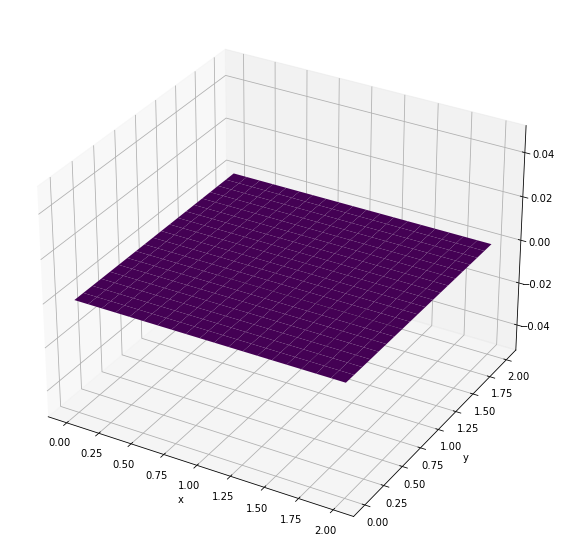

0.1 0.1


In [6]:
# contants 
x_max = 2
y_max = 2
nx = 20
ny = 20
dx = x_max / (nx)
dy = y_max / (ny)
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)

#init
p_init = np.zeros((ny,nx))
b_init = np.zeros((ny,nx))

#source-b_init
b_init[int(.5/dy),int(.5/dx)] = 100
b_init[int(1.5/dy),int(1.5/dx)] = -100

p0 = p_init.copy()
b0 = b_init.copy()

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                     
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

print(dx,dy)

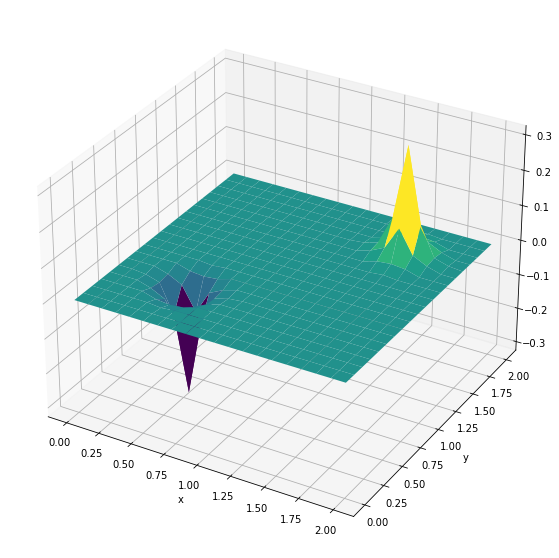

In [67]:
# finite difference 
p0 = p_init.copy()
b0 = b_init.copy()
c = 0
target = 1e-3

# while True:
#     p = p0.copy()
#     for i in range(1,nx-1):
#         for j in range(1,ny-1):
#             p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1] - b0[i,j]*dy*dx)
#     c = c+1
#     error = (abs(np.sum(np.abs(p)) -np.sum(np.abs(p0))))    
#     if error < target:
#         print(c)
#         break

for _ in range(4):
    p = p0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1] - b0[i,j]*dy*dx)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                     
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


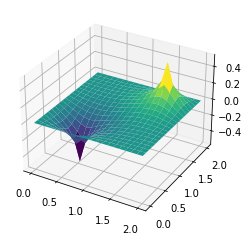

In [68]:
p0 = p_init.copy()
b0 = b_init.copy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)


def animate(frames,p0,surf):
    p = p0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1] - b0[i,j]*dy*dx)
    ax.clear()
    surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)

    return surf,


anim = animation.FuncAnimation(fig,animate,fargs=(p0,surf) , frames=220, repeat = True)
anim.save('2d possion.gif', fps = 20)
plt.show()